<a href="https://colab.research.google.com/github/youssef-snoussi/DL-notebook/blob/main/Artificial_Neural_Networks_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

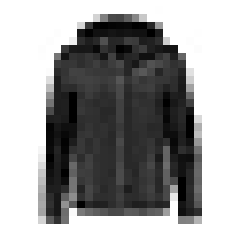

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[4]]

'Ankle boot'

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

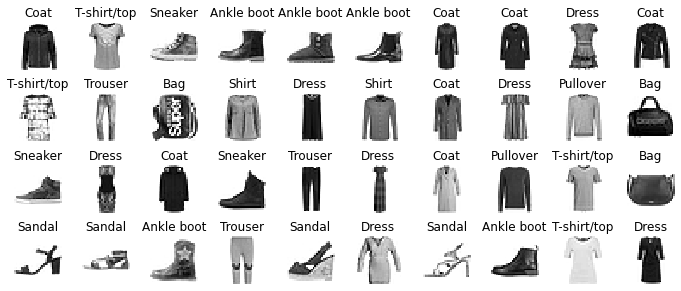

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Model construction


In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer(hidden1.name) is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02819265, -0.0732488 ,  0.06061815, ...,  0.02633305,
         0.0675243 ,  0.05127157],
       [-0.01814159, -0.03994504, -0.06980813, ...,  0.02020489,
        -0.06521691,  0.05646549],
       [ 0.01423521, -0.0284534 , -0.02758731, ...,  0.02223913,
        -0.04811756,  0.03302684],
       ...,
       [-0.00037482,  0.00207852, -0.0464583 , ...,  0.04506601,
        -0.06103198,  0.03424791],
       [ 0.06526057, -0.0727558 , -0.01815489, ..., -0.05240218,
         0.02025893,  0.06494208],
       [-0.0533698 , -0.06932276,  0.05851164, ...,  0.07342437,
         0.04813518,  0.0700545 ]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

Model Compiling


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Model training

In [26]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid)) 

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7291 - accuracy: 0.7592 - val_loss: 0.5129 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4933 - accuracy: 0.8297 - val_loss: 0.4797 - val_accuracy: 0.8334
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4481 - accuracy: 0.8434 - val_loss: 0.4525 - val_accuracy: 0.8434
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4209 - accuracy: 0.8518 - val_loss: 0.4122 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4004 - accuracy: 0.8599 - val_loss: 0.3782 - val_accuracy: 0.8716
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3839 - accuracy: 0.8651 - val_loss: 0.3718 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3708 - accuracy: 0.8700 - val_loss: 0.3861 - val_accuracy:

In [27]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [28]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Learning Curves

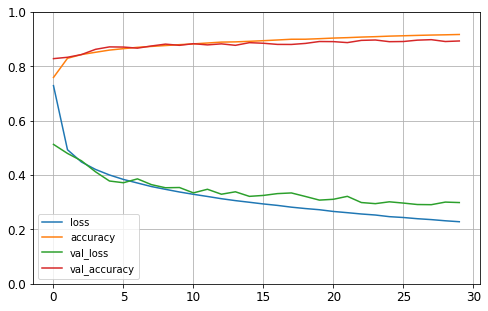

In [30]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8802


[0.3330649733543396, 0.8802000284194946]

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:

y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

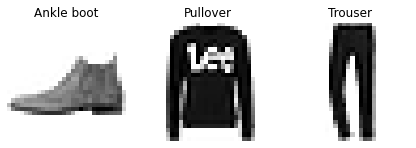

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Exercice**

Plot learning cuves when using different optimizers

In [37]:

#optimizers:RMSprop
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [38]:
osgd=model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8802


In [39]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4241 - accuracy: 0.8521 - val_loss: 0.4883 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3686 - accuracy: 0.8696 - val_loss: 0.3799 - val_accuracy: 0.8762
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3546 - accuracy: 0.8770 - val_loss: 0.3769 - val_accuracy: 0.8760
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3455 - accuracy: 0.8818 - val_loss: 0.3904 - val_accuracy: 0.8818
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3326 - accuracy: 0.8852 - val_loss: 0.4476 - val_accuracy: 0.8770
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8888 - val_loss: 0.4376 - val_accuracy: 0.8770
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3241 - accuracy: 0.8921 - val_loss: 0.4369 - val_accuracy:

In [40]:
history1.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

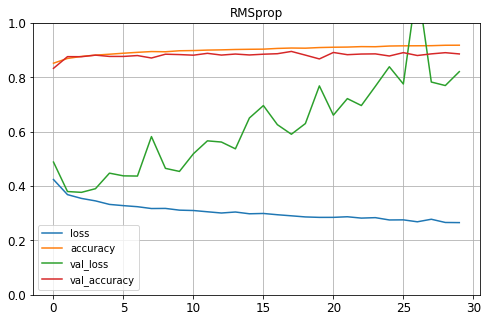

In [41]:
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('RMSprop'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
RMSprop = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.7815 - accuracy: 0.8754


In [43]:
#optimizers:Nadam
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [44]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2870 - accuracy: 0.9110 - val_loss: 0.5159 - val_accuracy: 0.8882
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9155 - val_loss: 0.5908 - val_accuracy: 0.8874
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2335 - accuracy: 0.9187 - val_loss: 0.4931 - val_accuracy: 0.8934
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2302 - accuracy: 0.9191 - val_loss: 0.4610 - val_accuracy: 0.8922
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2127 - accuracy: 0.9236 - val_loss: 0.4914 - val_accuracy: 0.8938
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2142 - accuracy: 0.9238 - val_loss: 0.4514 - val_accuracy: 0.8938
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2095 - accuracy: 0.9245 - val_loss: 0.4494 - val_accuracy:

In [45]:
history2.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

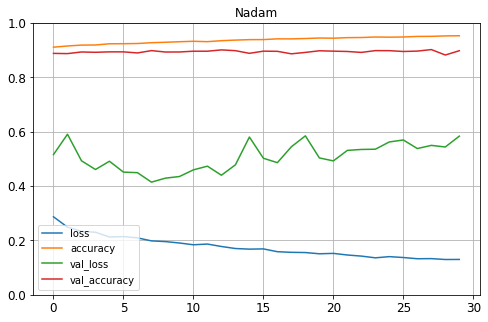

In [46]:
pd.DataFrame(history2.history).plot(figsize=(8, 5),title=('Nadam'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
Nadam = model.evaluate(X_test, y_test)
Nadam

313/313 [==============================] - 1s 2ms/step - loss: 0.5896 - accuracy: 0.8925


[0.5896480083465576, 0.8924999833106995]

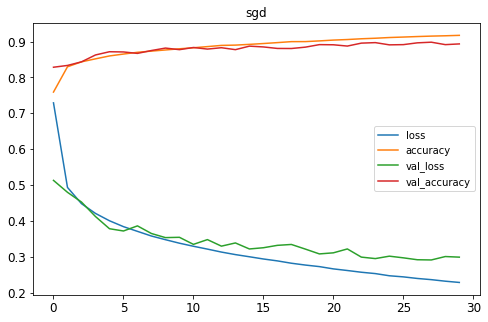

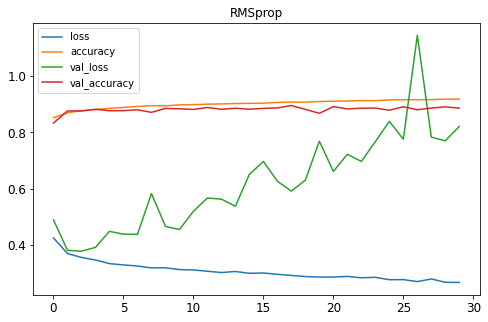

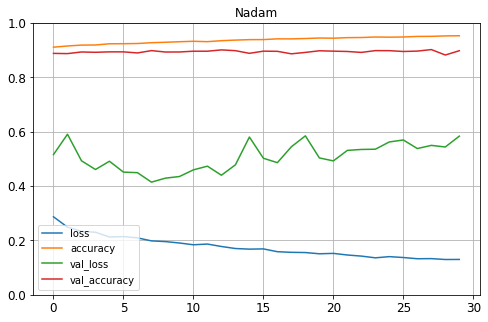

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5),title=('sgd'))
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('RMSprop'))
pd.DataFrame(history2.history).plot(figsize=(8, 5),title=('Nadam'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Plot learning curves for different batch sizes

In [49]:
#batch size = 1
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [50]:
history4 = model.fit(X_train, y_train, batch_size=1, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
55000/55000 [==============================] - 89s 2ms/step - loss: 0.8102 - accuracy: 0.7458 - val_loss: 0.6500 - val_accuracy: 0.8474
Epoch 2/30
55000/55000 [==============================] - 92s 2ms/step - loss: 0.3975 - accuracy: 0.8674 - val_loss: 0.6352 - val_accuracy: 0.8558
Epoch 3/30
55000/55000 [==============================] - 90s 2ms/step - loss: 0.3222 - accuracy: 0.8904 - val_loss: 0.5910 - val_accuracy: 0.8714
Epoch 4/30
55000/55000 [==============================] - 89s 2ms/step - loss: 0.2822 - accuracy: 0.9026 - val_loss: 0.6299 - val_accuracy: 0.8698
Epoch 5/30
55000/55000 [==============================] - 90s 2ms/step - loss: 0.2604 - accuracy: 0.9112 - val_loss: 0.5509 - val_accuracy: 0.8804
Epoch 6/30
55000/55000 [==============================] - 88s 2ms/step - loss: 0.2469 - accuracy: 0.9157 - val_loss: 0.6179 - val_accuracy: 0.8676
Epoch 7/30
55000/55000 [==============================] - 89s 2ms/step - loss: 0.2360 - accuracy: 0.9190 - val_loss: 0

In [51]:
BS1 = model.evaluate(X_test, y_test)
BS1

313/313 [==============================] - 1s 2ms/step - loss: 0.7244 - accuracy: 0.8849


[0.7244082689285278, 0.8848999738693237]

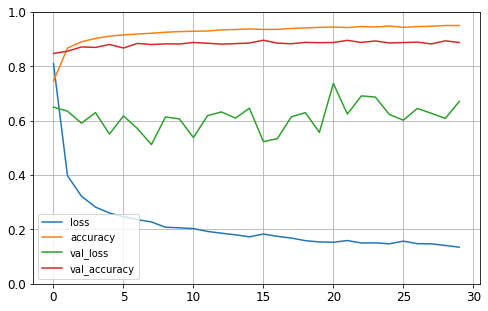

In [52]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
#batch size = 10
h3 = model.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.0848 - accuracy: 0.9678 - val_loss: 0.6668 - val_accuracy: 0.8996
Epoch 2/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.0743 - accuracy: 0.9710 - val_loss: 0.6766 - val_accuracy: 0.8992
Epoch 3/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.0713 - accuracy: 0.9728 - val_loss: 0.6964 - val_accuracy: 0.8988
Epoch 4/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.0694 - accuracy: 0.9733 - val_loss: 0.7085 - val_accuracy: 0.8980
Epoch 5/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.0680 - accuracy: 0.9739 - val_loss: 0.7232 - val_accuracy: 0.9008
Epoch 6/30
5500/5500 [==============================] - 11s 2ms/step - loss: 0.0666 - accuracy: 0.9740 - val_loss: 0.7406 - val_accuracy: 0.9000
Epoch 7/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.0652 - accuracy: 0.9748 - val_loss: 0.7463 - val_ac

In [54]:
BS10 = model.evaluate(X_test, y_test)
BS10

313/313 [==============================] - 1s 2ms/step - loss: 0.9583 - accuracy: 0.8972


[0.9582796692848206, 0.8971999883651733]

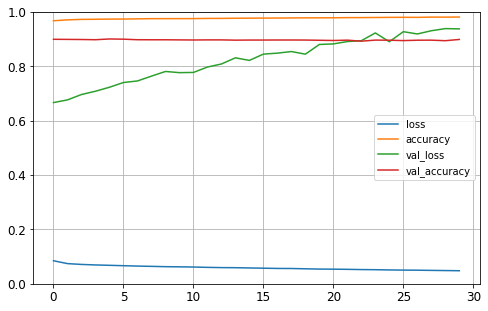

In [55]:
pd.DataFrame(h3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Learning curves for different epochs

In [56]:
#number of epochs=1
h6 = model.fit(X_train, y_train, batch_size=32, epochs=1,
                    validation_data=(X_valid, y_valid))

1719/1719 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9827 - val_loss: 0.9606 - val_accuracy: 0.8956


In [57]:
epochs1 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9772 - accuracy: 0.8974


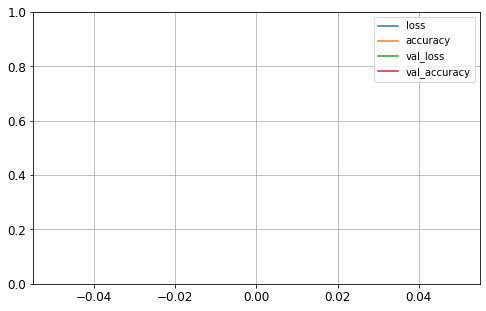

In [58]:
pd.DataFrame(h6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
#number of epochs=10
h7 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9834 - val_loss: 0.9618 - val_accuracy: 0.8968
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9832 - val_loss: 0.9692 - val_accuracy: 0.8964
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0436 - accuracy: 0.9835 - val_loss: 0.9794 - val_accuracy: 0.8958
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9835 - val_loss: 0.9767 - val_accuracy: 0.8956
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9834 - val_loss: 0.9806 - val_accuracy: 0.8956
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9837 - val_loss: 0.9800 - val_accuracy: 0.8952
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9839 - val_loss: 0.9794 - val_accuracy:

In [60]:
ep10 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0105 - accuracy: 0.8971


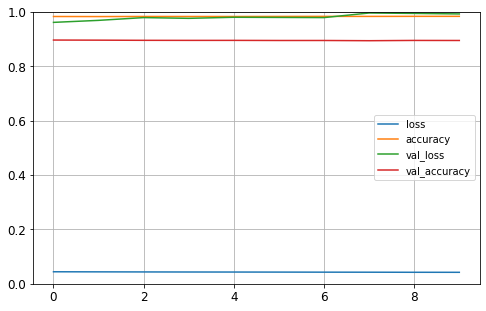

In [61]:
pd.DataFrame(h7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [62]:
#number of epochs=40
h8 = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0421 - accuracy: 0.9840 - val_loss: 0.9968 - val_accuracy: 0.8958
Epoch 2/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0418 - accuracy: 0.9842 - val_loss: 1.0029 - val_accuracy: 0.8940
Epoch 3/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9843 - val_loss: 1.0013 - val_accuracy: 0.8954
Epoch 4/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9843 - val_loss: 1.0056 - val_accuracy: 0.8948
Epoch 5/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0413 - accuracy: 0.9846 - val_loss: 1.0139 - val_accuracy: 0.8946
Epoch 6/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0410 - accuracy: 0.9848 - val_loss: 1.0146 - val_accuracy: 0.8944
Epoch 7/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9847 - val_loss: 1.0173 - val_accuracy:

In [63]:
ep40 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1523 - accuracy: 0.8960


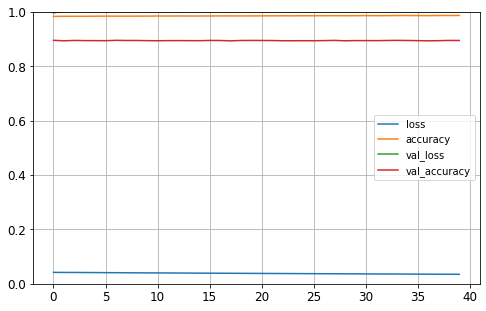

In [64]:
pd.DataFrame(h8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Adding more layers

In [65]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(250, activation="relu"))
model.add(keras.layers.Dense(180, activation="relu"))
model.add(keras.layers.Dense(70, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [66]:
model.layers

In [67]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [68]:
h9 = model.fit(X_train, y_train, batch_size=1000, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
55/55 [==============================] - 0s 7ms/step - loss: 2.1641 - accuracy: 0.1961 - val_loss: 2.0100 - val_accuracy: 0.2528
Epoch 2/40
55/55 [==============================] - 0s 5ms/step - loss: 1.8471 - accuracy: 0.3959 - val_loss: 1.6443 - val_accuracy: 0.5688
Epoch 3/40
55/55 [==============================] - 0s 5ms/step - loss: 1.4431 - accuracy: 0.6015 - val_loss: 1.2342 - val_accuracy: 0.6254
Epoch 4/40
55/55 [==============================] - 0s 5ms/step - loss: 1.1243 - accuracy: 0.6320 - val_loss: 1.0039 - val_accuracy: 0.6522
Epoch 5/40
55/55 [==============================] - 0s 4ms/step - loss: 0.9508 - accuracy: 0.6653 - val_loss: 0.8816 - val_accuracy: 0.6918
Epoch 6/40
55/55 [==============================] - 0s 4ms/step - loss: 0.8554 - accuracy: 0.7023 - val_loss: 0.8091 - val_accuracy: 0.7248
Epoch 7/40
55/55 [==============================] - 0s 4ms/step - loss: 0.7944 - accuracy: 0.7282 - val_loss: 0.7601 - val_accuracy: 0.7400
Epoch 8/40
55/55 [==

In [69]:
me = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4769 - accuracy: 0.8359


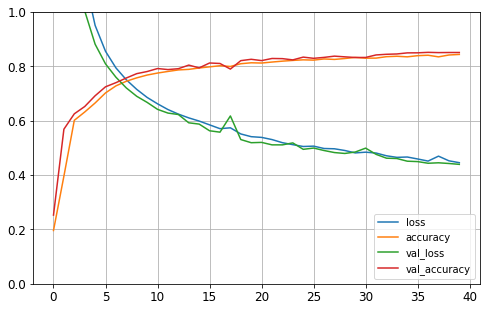

In [70]:
pd.DataFrame(h9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()